<a href="https://colab.research.google.com/github/Dipendra-Pal/KNN/blob/main/Visualization_for_kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter
from sklearn.model_selection import train_test_split

In [ ]:
# Step 1: Generate a synthetic binary dataset with 2 features
np.random.seed(0)
class_0 = np.random.multivariate_normal([2, 2], [[0.5, 0], [0, 0.5]], 50)
class_1 = np.random.multivariate_normal([4, 4], [[0.5, 0], [0, 0.5]], 50)

X = np.vstack((class_0, class_1))
y = np.array([0]*50 + [1]*50)

In [ ]:
# Step 2: Train-test split (not used in visualization but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Euclidean distance function
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b)**2))

In [ ]:
# Step 4: kNN for one test point
def predict(X_train, y_train, x_test, k):
    distances = [(euclidean_distance(x_train, x_test), label) for x_train, label in zip(X_train, y_train)]
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for _, label in distances[:k]]
    return Counter(k_nearest).most_common(1)[0][0]


In [ ]:
# Step 5: Predict all points in test set
def knn_predict(X_train, y_train, X_test, k):
    return np.array([predict(X_train, y_train, x, k) for x in X_test])

In [ ]:
# Step 6: Visualization of decision boundaries
def plot_decision_boundary(X_train, y_train, k):
    h = 0.05  # Step size in the mesh grid
    x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict the class for each point in the mesh grid
    grid_points = np.c_[xx.ravel(), yy.ravel()]
    Z = knn_predict(X_train, y_train, grid_points, k)
    Z = Z.reshape(xx.shape)

    # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    # Plot the decision boundary
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"k-NN Decision Boundary (k={k})")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

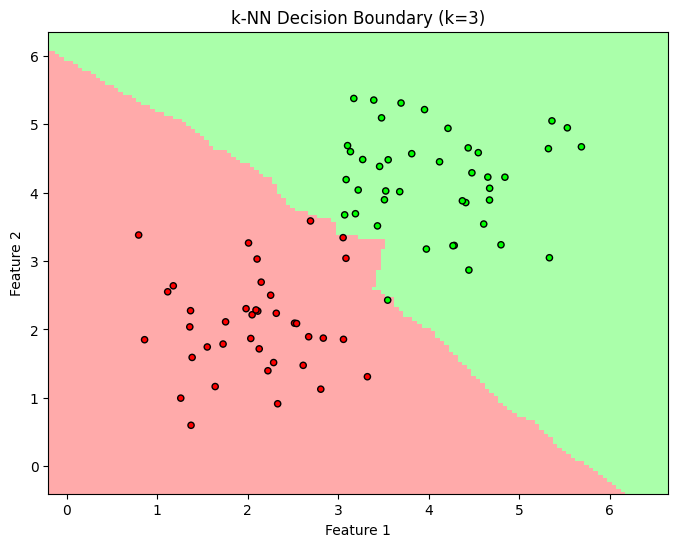

In [ ]:
# Step 8: Run the visualization with k = 3
plot_decision_boundary(X_train, y_train, k=3)